<a href="https://colab.research.google.com/github/Hadeer-Youssef/OCR_Practic/blob/main/solution_task1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# solution for task1

Write an algorithm to extract machine readable zone "MRZ" in attached images .
Input  is image .
Output is txt file has 2 lines ("MRZ") .

In [ ]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2
import os
import glob
import pytesseract
import keras_ocr
#os.chdir(r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\aligment_images")

In [ ]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [ ]:
path=r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\images"

# image Preprocessing

#we using Cropping and perspective restoration(warpPerspective) by use rectangle points to calculate destination points of the images with mouse points

[[300  86]
 [  0   0]
 [  0   0]
 [  0   0]]
[[300  86]
 [309 534]
 [  0   0]
 [  0   0]]
[[300  86]
 [309 534]
 [ 14   9]
 [  0   0]]
[[300  86]
 [309 534]
 [ 14   9]
 [ 21 595]]


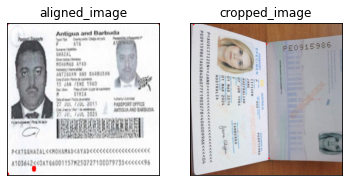

[[586 498]
 [309 534]
 [ 14   9]
 [ 21 595]]
[[586 498]
 [ 77 594]
 [ 14   9]
 [ 21 595]]
[[586 498]
 [ 77 594]
 [592  15]
 [ 21 595]]
[[586 498]
 [ 77 594]
 [592  15]
 [  2  67]]


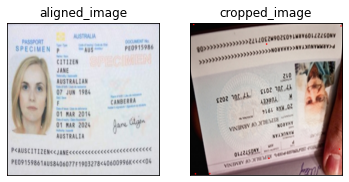

[[289 127]
 [ 77 594]
 [592  15]
 [  2  67]]
[[289 127]
 [299 555]
 [592  15]
 [  2  67]]
[[289 127]
 [299 555]
 [  8 127]
 [  2  67]]
[[289 127]
 [299 555]
 [  8 127]
 [ 20 582]]


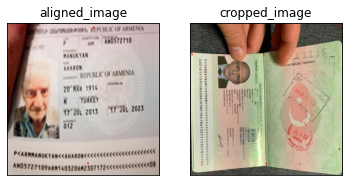

[[596 593]
 [299 555]
 [  8 127]
 [ 20 582]]
[[596 593]
 [  5 594]
 [  8 127]
 [ 20 582]]
[[596 593]
 [  5 594]
 [592  10]
 [ 20 582]]
[[596 593]
 [  5 594]
 [592  10]
 [  4  11]]


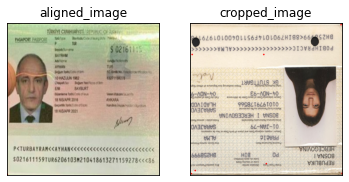

[[ 65 166]
 [  5 594]
 [592  10]
 [  4  11]]
[[ 65 166]
 [582 170]
 [592  10]
 [  4  11]]
[[ 65 166]
 [582 170]
 [  2 571]
 [  4  11]]
[[ 65 166]
 [582 170]
 [  2 571]
 [597 575]]


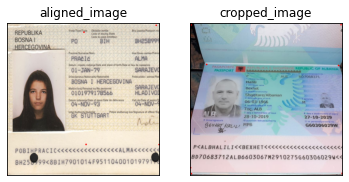

[[137 284]
 [582 170]
 [  2 571]
 [597 575]]
[[137 284]
 [505 308]
 [  2 571]
 [597 575]]
[[137 284]
 [505 308]
 [110 539]
 [597 575]]
[[137 284]
 [505 308]
 [110 539]
 [494 559]]


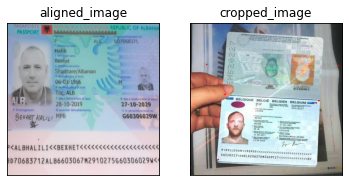

[[ 48 301]
 [505 308]
 [110 539]
 [494 559]]
[[ 48 301]
 [423 312]
 [110 539]
 [494 559]]
[[ 48 301]
 [423 312]
 [ 42 550]
 [494 559]]
[[ 48 301]
 [423 312]
 [ 42 550]
 [417 562]]


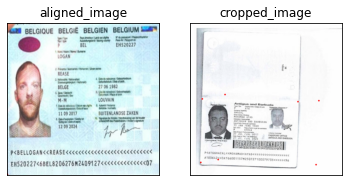

In [ ]:
circles = np.zeros((4, 2), np.int32)
counter = 0

def mousePoints(event, x, y, flags, params):
        global counter
        if event == cv2.EVENT_LBUTTONDOWN:
             if counter < 4:
                circles[counter] = x, y
                counter += 1
                print(circles)


for img_path in glob.glob(os.path.join(path, "*.jpg")) + glob.glob(os.path.join(path, "*.png")):
        label = img_path.split("\\")[-1]
        img1 = cv2.imread(img_path)
        gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        # Find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        c = max(cnts, key=cv2.contourArea)

        # Find the extreme points in the largest contour
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # Crop the image using the extreme points
        cropped_image = img1[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
        new_resized= cropped_image.copy()
        resized_image = cv2.resize(new_resized, (600, 600))
        # Perform warpPerspective transformation to align the cropped image
        #250,350

        width, height =600,600

        if resized_image.shape[0] > 0 and resized_image.shape[1] > 0:
            while True:
                if counter == 4:

                    pts1 = np.float32([circles[0], circles[1], circles[2], circles[3]])
                    pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
                    M = cv2.getPerspectiveTransform(pts1, pts2)
                    aligned_image = cv2.warpPerspective(resized_image, M, (width, height))

                     # Save the aligned image to the output folder
                    output_folder=r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\aligment_images\aligment2\alihment3"
                    filename = os.path.splitext(label)[0] + "_aligned.jpg"
                    save_path = os.path.join(output_folder, filename)
                    cv2.imwrite(save_path, aligned_image)
                    cv2.imshow("Aligned Image", aligned_image)
                    counter = 0  # Reset counter after transformation

                for i in range(0, 4):
                    cv2.circle(resized_image, (circles[i][0], circles[i][1]), 3, (0, 0, 255), cv2.FILLED)

                cv2.imshow('Cropped Image', resized_image)
                cv2.setMouseCallback("Cropped Image", mousePoints)

                k = cv2.waitKey(1)
                if k == 27:  # Press 'Esc' to exit the loop
                    break
                if counter ==4 :

                    plt.subplot(1, 2, 1)
                    plt.imshow(cv2.cvtColor(aligned_image,cv2.COLOR_BGR2RGB))
                    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,
                                                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
                    plt.title('aligned_image')

                    plt.subplot(1, 2, 2)
                    plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))
                    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,
                                                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)
                    plt.title('cropped_image')
                    plt.show()
        else:
            print(f"Invalid image: {img_path}")

cv2.destroyAllWindows()

In [ ]:
path2=r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\aligment_images"

In [ ]:

# initialize a rectangular and square structuring kernel
i=0
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (27, 7))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 35))

In [ ]:
# loop over the input image paths

for imagePath in glob.glob(os.path.join(path2, "*.jpg")) :
    # load the image, resize it, and convert it to grayscale
    image = cv2.imread(imagePath)
    #cv2.imshow("original",image)
    image = imutils.resize(image, height=600)
    #cv2.imshow("resized",image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.imshow("gray",gray)
	# smooth the image using a 3x3 Gaussian, then apply the blackhat
	# morphological operator to find dark regions on a light background
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    #cv2.imshow("gray_gaussian",gray)
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
    #cv2.imshow("blackhat",blackhat)
    gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradX = np.absolute(gradX)
    (minVal, maxVal) = (np.min(gradX), np.max(gradX))
    gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")
    #cv2.imshow("gradX",gradX)
    gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
    thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    #cv2.imshow("thresh",thresh)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
    thresh = cv2.erode(thresh, None, iterations=4)
    #cv2.imshow("erode",thresh)
    p = int(image.shape[1] * 0.05)
    thresh[:, 0:p] = 0
    thresh[:, image.shape[1] - p:] = 0
    #cv2.imshow("erode2",thresh)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # loop over the contours
    for c in cnts:
            # compute the bounding box of the contour and use the contour to
            # compute the aspect ratio and coverage ratio of the bounding box
            # width to the width of the image
            (x, y, w, h) = cv2.boundingRect(c)
            ar = w / float(h)
            crWidth = w / float(gray.shape[1])
            # check to see if the aspect ratio and coverage width are within
            # acceptable criteria
            if ar > 5 and crWidth > 0.75:
                # pad the bounding box since we applied erosions and now need
                # to re-grow it
                pX = int((x + w) * 0.03)
                pY = int((y + h) * 0.03)
                (x, y) = (x - pX, y - pY)
                (w, h) = (w + (pX * 2), h + (pY * 2))
                # extract the ROI from the image and draw a bounding box
                # surrounding the MRZ
                roi = image[y:y + h, x:x + w].copy()
                 #Apply Tesseract OCR for text extraction

                extracted_text = pytesseract.image_to_string(roi, config='--psm 3')
                print(extracted_text)
                 # Save extracted text to the output txt file
                output_txt_path = f"extracted_text_{i}.txt"
                with open(output_txt_path, 'w') as txt_file:
                    txt_file.write(extracted_text)
                i+=1
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                break
	# show the output images
    cv2.imshow("Image", image)
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)


cv2.destroyAllWindows()


SAUSCITIZENK< J ANESK&<6<6 44K K KEK GEEK KE EEE
£09159861AUS8406077F1903278<40600996K<<<<04

PCARMMANUKY ANCCAMARONC << 4 KKK KEE EKE EE EEEEE
\NOS727 109aRMI4OSZ06N2 SOT 1T2<<<KCCeKKEKKEEOB

PXTURBAYRAMSSAYHANS<<< <<< <<< KECK KKK KKK KKK
$021611159TUR6206103M210418613271159278<<<86

ii eticiaeceasnssateven
BH25 99¢881H7901016F95110600101979%8

<ALBHALIL1<<BEXHE T<<<<<<<<<<<<KKK KKK SK
D70683712ALB6603067N2910275G60306029W<

P<BELLOGAN<<REASEXKK<<K<<<K KK KEKE KKK KKK KKK
EH520227<6BEL8206276M 2409127 <<<<<<<<<xcxKc07

CATGGHATALSNOHAMADSAYAD SEEK KKK KK RKC KK
103642<<0A 76600115 7N250727 1 D0DT97SS<<<cced6




#experiment on one image

In [ ]:
image = cv2.imread(r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\aligment_images\0_aligned.jpg")
cv2.imshow("original",image)
image = cv2.resize(image, (600,600))
cv2.imshow("resized",image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray",gray)
# smooth the image using a 3x3 Gaussian, then apply the blackhat
# morphological operator to find dark regions on a light background
gray = cv2.GaussianBlur(gray, (3, 3), 0)
cv2.imshow("gray_gaussian",gray)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
cv2.imshow("blackhat",blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# compute the Scharr gradient of the blackhat image and scale the
# result into the range [0, 255]
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")
cv2.imshow("gradX",gradX)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
# apply a closing operation using the rectangular kernel to close
# gaps in between letters -- then apply Otsu's thresholding method
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imshow("thresh",thresh)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
# perform another closing operation, this time using the square
# kernel to close gaps between lines of the MRZ, then perform a
# series of erosions to break apart connected components
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
thresh = cv2.erode(thresh, None, iterations=4)
cv2.imshow("erode",thresh)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
# during thresholding, it's possible that border pixels were
# included in the thresholding, so let's set 5% of the left and
# right borders to zero
p = int(image.shape[1] * 0.05)
thresh[:, 0:p] = 0
thresh[:, image.shape[1] - p:] = 0
cv2.imshow("erode2",thresh)
cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:
#cv2.imshow("gray_easyosr",gray_easyosr)
# find contours in the thresholded image and sort them by their
# size
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
# loop over the contours
for c in cnts:
        # compute the bounding box of the contour and use the contour to
        # compute the aspect ratio and coverage ratio of the bounding box
        # width to the width of the image
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)
        crWidth = w / float(gray.shape[1])
		# check to see if the aspect ratio and coverage width are within
        # acceptable criteria
        if ar > 5 and crWidth > 0.75:
			# pad the bounding box since we applied erosions and now need
			# to re-grow it
            pX = int((x + w) * 0.03)
            pY = int((y + h) * 0.03)
            (x, y) = (x - pX, y - pY)
            (w, h) = (w + (pX * 2), h + (pY * 2))
            # extract the ROI from the image and draw a bounding box
            # surrounding the MRZ
            roi = image[y:y + h, x:x + w]
             #Apply Tesseract OCR for text extraction
            extracted_text = pytesseract.image_to_string(roi, config='--psm 3')
            print(extracted_text)
            #reader = easyocr.Reader(['en'])
            #result = reader.readtext(roi)
            #print(result)
            cv2.imwrite("roi.jpg",  roi)
             # Save extracted text to the output txt file
            output_txt_path = f"extracted_text_0.txt"
            with open(output_txt_path, 'w') as txt_file:
                txt_file.write(extracted_text)

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            break
# show the output images
cv2.imshow("Image", image)
cv2.imshow("ROI", roi)
cv2.waitKey(0)


#trails for using other Ocr algorithm but i found that tesseract is the best for my results

In [ ]:
#gray_easyosr = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#cv2.imshow("gray_easyosr",gray_easyosr)
#cv2.waitKey(0)


In [ ]:
#reader = easyocr.Reader(['en'])
#result = reader.readtext(gray_easyosr)
#result

In [ ]:
#pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
#images = [keras_ocr.tools.read(r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task1\aligment_images\roi.jpg")]
#np.shape(images)

In [ ]:
#prediction_groups = pipeline.recognize(images)